In [1]:
import pandas as pd
data = pd.read_csv("toy dataset.csv")

Data Loading

In [ ]:
data

,SNo,Name,Gender,Height,Output
0,1,A,F,1.60,S
1,2,B,M,2.00,T
2,3,C,F,1.90,M
3,4,D,F,1.88,M
4,5,E,F,1.70,S
5,6,F,M,1.85,M
6,7,G,F,1.60,S
7,8,H,M,1.70,S
8,9,I,M,2.20,T
9,10,J,M,2.10,T


In [ ]:
data.drop(labels="SNo",inplace=True,axis=1)

In [ ]:
data

,Name,Gender,Height,Output
0,A,F,1.60,S
1,B,M,2.00,T
2,C,F,1.90,M
3,D,F,1.88,M
4,E,F,1.70,S
5,F,M,1.85,M
6,G,F,1.60,S
7,H,M,1.70,S
8,I,M,2.20,T
9,J,M,2.10,T


In [ ]:
data1 = data[["Gender","Height","Output"]]

### Proprocessing Data - converting categorical variable to numerical attribute

In [ ]:
data1["Gender"].replace({"M":0,"F":1},inplace=True)
data1["Output"].replace({"S":0,"M":1,"T":2},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


### Data matrix and class columns

In [ ]:
from sklearn.model_selection import train_test_split
X = data1.drop("Output",axis=1)
y = data1["Output"]

In [ ]:
import numpy as np
from math import exp
from math import sqrt
from math import pi

This function is used to get class label of the data

In [ ]:
def getting_class_label(y):
  label = []
  for value in y:
    if value not in label:
      label.append(value)
  return sorted(label)

This function returns the prior probaility of class

In [ ]:
def prior_prob_of_class(X,y,class_label):
  total_datapoint = len(y)
  class_count = 0
  for index in range(len(y)):
    if y[index]==class_label:
      class_count +=1
  return class_count/total_datapoint

This function is used to calculate probability for numerical attribute using guassain probability density function

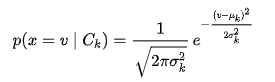

In [ ]:
def gaussian_prob(X,y,query_value,class_label):
  height_value = []
  for index in range(len(y)):
    if y[index]==class_label:
      height_value.append(X[index])
  mean = np.mean(height_value)
  std = np.std(height_value)
  return (exp((-1)*((query_value-mean)**2)/(2*(std**2))))/std*(sqrt(2*pi))

This function is used to calculate probability for categorical variable.

In order to avoid zero probability problem, we used laplace smoothing where value of alpha is 1 in below equation
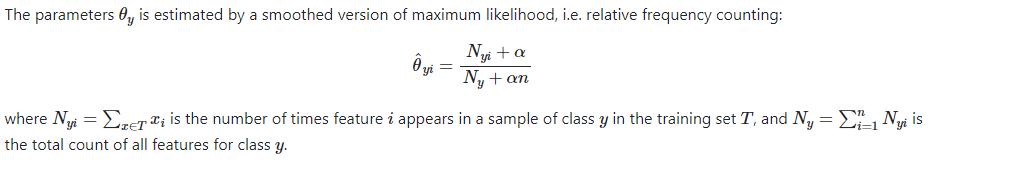

In [ ]:
def categorical_prob(X,y,query_value,class_label):
  query_count = 0
  class_count = 0
  alpha = 1
  for index in range(len(X)):
    if X[index]==query_value:
      query_count+=1
      if y[index]==class_label:
        class_count+=1
  feature_unique_value = len(X.value_counts())
  prob = ((query_count+alpha)/(alpha*feature_unique_value+class_count))
  return prob

This function calculates the probability for datapoints belonging to each class

In [ ]:
def calculate_prob(X,y,query_gender,query_height):
  class_labels  = getting_class_label(y)
  posterior_prob = [0 for i in range(len(class_labels))]
  for class_label in class_labels:
    total_prob = 1
    for col in X.columns:
    # https://thispointer.com/how-to-get-check-data-types-of-dataframe-columns-in-python-pandas/
      if X.dtypes[col]==np.float:
        prob = gaussian_prob(X[col],y,query_height,class_label) 
      else:
        prob = categorical_prob(X[col],y,query_gender,class_label)
      total_prob *= prob
    posterior_prob[int(class_label)]=prior_prob_of_class(X,y,class_label)*total_prob
  return posterior_prob

This function return the class label of datapoint with highest probability

In [ ]:
def predict_prob(Name,gender,height):
  if gender=="M":
    prob = calculate_prob(X,y,0,height)
  else:
    prob = calculate_prob(X,y,1,height)
  class_pred = prob.index(max(prob))
  if class_pred==0:
    print("{} belongs to short category of people".format(Name))
  elif class_pred==1:
     print("{} belongs to Medium category of people".format(Name))
  else:
    print("{} belongs to Tall category of people".format(Name))

Enter test query in the following order:

1. Name 
2. Gender - M for male and F for female
3. Height

In [ ]:
Name = input()
Gender = input()
Height = float(input())
predict_prob(Name,Gender,Height)

M
M
1.96
M belongs to Medium category of people


Conclusion - 
1. Because of assumption of independent attribute, peformance of naive bayes classifiers decreases.
2. Time taken by Naive bayes during test time is very less as it stores probability during training of the model